# 翡翠水庫雨量與水位變化量的關係
說明 : 讀取4/16、4/17翡翠水庫水位及雨量等資料，處理過後合併Dataframe，並將缺少的雨量資料補遺，最後分析雨量與水位變化量的關係 
## 資料來源 : [翡翠水庫即時水位雨量查詢](https://w3.feitsui.gov.tw/WLRain.aspx?SP=SP_DSP_014_001&ccms_cs=1&ccms_cs=1)

In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 4/16資料

In [2]:
df=pd.read_html('https://w3.feitsui.gov.tw/WLRain.aspx?SP=SP_DSP_014_003')
len(df)

3

In [3]:
data_413=df[0]
data_413.head()

,0,1,2,3,4,5,6,7,8,9
0,時間,水庫水位(公尺),有效蓄水量(百萬立方公尺),雨量(毫米),NaN,NaN,NaN,NaN,NaN,NaN
1,翡翠,十三股,九芎根,坪林,碧湖,太平,集水區加權平均,NaN,NaN,NaN
2,00:00,160.26,250.461,-,-,-,-,-,-,-
3,01:00,160.26,250.461,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,02:00,160.27,250.543,0.5,0.5,1.5,1.0,1.0,0.0,0.8


In [4]:
col1=data_413.loc[0].values
col2=data_413.loc[1].values
colnames=np.append(col1,col2,axis=0)
colnames=colnames[[0,1,2,10,11,12,13,14,15,16]]
colnames

array(['時間', '水庫水位(公尺)', '有效蓄水量(百萬立方公尺)', '翡翠', '十三股', '九芎根', '坪林', '碧湖',
       '太平', '集水區加權平均'], dtype=object)

In [5]:
data_413.columns=colnames
data_413=data_413[2:]
data_413.head()

,時間,水庫水位(公尺),有效蓄水量(百萬立方公尺),翡翠,十三股,九芎根,坪林,碧湖,太平,集水區加權平均
2,00:00,160.26,250.461,-,-,-,-,-,-,-
3,01:00,160.26,250.461,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,02:00,160.27,250.543,0.5,0.5,1.5,1.0,1.0,0.0,0.8
5,03:00,160.27,250.543,0.5,0.0,0.5,1.0,0.0,2.0,0.7
6,04:00,160.27,250.543,1.0,1.5,1.5,2.0,1.0,0.0,1.1


In [6]:
a=data_413.loc[len(data_413)+1].values
b=a[0:8]
rain_413=np.append(['',''],b,axis=0)
rain_413

array(['', '', '2019/04/16累積雨量', '36.0', '36.5', '34.0', '36.0', '29.5',
       '29.5', '32.1'], dtype=object)

In [7]:
rain_413=rain_413.reshape(1,10)
data_413.loc[[len(data_413)+1],:]=rain_413

C:\Users\Administrator\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## 4/17資料

In [8]:
df2=pd.read_html('https://w3.feitsui.gov.tw/WLRain.aspx?SP=SP_DSP_014_001&ccms_cs=1&ccms_cs=1')
len(df2)

3

In [9]:
data_414=df2[0]

In [10]:
data_414.columns=colnames
data_414=data_414[3:]

In [11]:
a=data_414.loc[len(data_414)+2].values
b=a[0:8]
rain_414=np.append(['',''],b,axis=0)
rain_414

array(['', '', '今日(2019/04/17)累積雨量', '3.0', '0.5', '1.5', '0.0', '0.0',
       '0.0', '0.4'], dtype=object)

In [12]:
rain_414=rain_414.reshape(1,10)
data_414.loc[[len(data_414)+2],:]=rain_414

C:\Users\Administrator\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## 合併資料

In [13]:
data=pd.concat([data_413,data_414],axis=0)
data.index=range(len(data))

In [14]:
data

,時間,水庫水位(公尺),有效蓄水量(百萬立方公尺),翡翠,十三股,九芎根,坪林,碧湖,太平,集水區加權平均
0,00:00,160.26,250.461,-,-,-,-,-,-,-
1,01:00,160.26,250.461,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,02:00,160.27,250.543,0.5,0.5,1.5,1.0,1.0,0.0,0.8
3,03:00,160.27,250.543,0.5,0.0,0.5,1.0,0.0,2.0,0.7
4,04:00,160.27,250.543,1.0,1.5,1.5,2.0,1.0,0.0,1.1
5,05:00,160.28,250.624,1.5,1.5,1.5,1.5,1.0,3.0,1.7
6,06:00,160.29,250.706,3.5,5.0,3.5,4.0,2.0,4.0,3.4
7,07:00,160.29,250.706,4.0,5.0,2.5,5.0,4.5,5.5,4.4
8,08:00,160.30,250.787,7.0,8.0,4.5,3.0,1.5,2.0,3.5
9,09:00,160.31,250.869,2.0,2.0,3.0,4.5,6.0,5.0,4.2


## 補第一列缺少的雨量資料
用4/16累積雨量回推00:00的雨量

In [15]:
stations=colnames[3:]
stations

array(['翡翠', '十三股', '九芎根', '坪林', '碧湖', '太平', '集水區加權平均'], dtype=object)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
時間               50 non-null object
水庫水位(公尺)         50 non-null object
有效蓄水量(百萬立方公尺)    50 non-null object
翡翠               50 non-null object
十三股              50 non-null object
九芎根              50 non-null object
坪林               50 non-null object
碧湖               50 non-null object
太平               50 non-null object
集水區加權平均          50 non-null object
dtypes: object(10)
memory usage: 4.0+ KB


In [17]:
data=data.replace('-',-9999)
data.head()

,時間,水庫水位(公尺),有效蓄水量(百萬立方公尺),翡翠,十三股,九芎根,坪林,碧湖,太平,集水區加權平均
0,00:00,160.26,250.461,-9999,-9999,-9999,-9999,-9999,-9999,-9999
1,01:00,160.26,250.461,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,02:00,160.27,250.543,0.5,0.5,1.5,1.0,1.0,0.0,0.8
3,03:00,160.27,250.543,0.5,0.0,0.5,1.0,0.0,2.0,0.7
4,04:00,160.27,250.543,1.0,1.5,1.5,2.0,1.0,0.0,1.1


In [18]:
data[stations]=data[stations].astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
時間               50 non-null object
水庫水位(公尺)         50 non-null object
有效蓄水量(百萬立方公尺)    50 non-null object
翡翠               50 non-null float64
十三股              50 non-null float64
九芎根              50 non-null float64
坪林               50 non-null float64
碧湖               50 non-null float64
太平               50 non-null float64
集水區加權平均          50 non-null float64
dtypes: float64(7), object(3)
memory usage: 4.0+ KB


In [19]:
for i in stations:
    s=sum(data.loc[1:24,i].values)
    data.loc[0,i]=data.loc[25,i]-s
data.head()

,時間,水庫水位(公尺),有效蓄水量(百萬立方公尺),翡翠,十三股,九芎根,坪林,碧湖,太平,集水區加權平均
0,00:00,160.26,250.461,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,01:00,160.26,250.461,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,02:00,160.27,250.543,0.5,0.5,1.5,1.0,1.0,0.0,0.8
3,03:00,160.27,250.543,0.5,0.0,0.5,1.0,0.0,2.0,0.7
4,04:00,160.27,250.543,1.0,1.5,1.5,2.0,1.0,0.0,1.1


# 雨量與水位變化量的關係

In [20]:
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc",size=15)

In [21]:
traindata=data.loc[:,['集水區加權平均','水庫水位(公尺)']].copy()
traindata.drop([25,49],inplace=True)
traindata.index=range(len(traindata))
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
集水區加權平均     48 non-null float64
水庫水位(公尺)    48 non-null object
dtypes: float64(1), object(1)
memory usage: 848.0+ bytes


## 計算水位變化量

In [22]:
traindata['水庫水位(公尺)']=traindata['水庫水位(公尺)'].astype('float')
traindata['水庫水位變化(公尺)'] = traindata['水庫水位(公尺)']-traindata['水庫水位(公尺)'].shift(1)
traindata=traindata.fillna(0)
traindata.head()

,集水區加權平均,水庫水位(公尺),水庫水位變化(公尺)
0,0.0,160.26,0.00
1,0.0,160.26,0.00
2,0.8,160.27,0.01
3,0.7,160.27,0.00
4,1.1,160.27,0.00


Text(0,0.5,'水庫水位變化(公尺)')

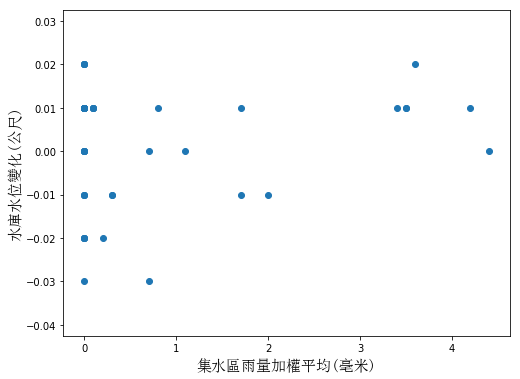

In [23]:
plt.figure(figsize=[8,6])
plt.scatter(traindata.集水區加權平均,traindata['水庫水位變化(公尺)'])
plt.xlabel('集水區雨量加權平均(毫米)', fontproperties = font)
plt.ylabel('水庫水位變化(公尺)', fontproperties = font)

In [24]:
from sklearn.linear_model import LinearRegression
regr=LinearRegression()

In [25]:
x=np.array(traindata.集水區加權平均)
X=x.reshape(len(x),1)

In [26]:
regr.fit(X,traindata['水庫水位變化(公尺)'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
Y=regr.predict(X)

Text(0,0.5,'水庫水位變化(公尺)')

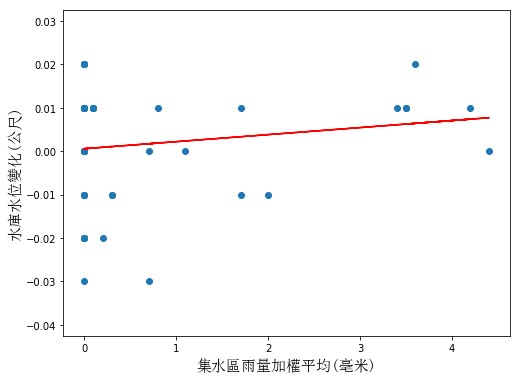

In [28]:
plt.figure(figsize=[8,6])
plt.scatter(traindata.集水區加權平均,traindata['水庫水位變化(公尺)'])
plt.plot(traindata.集水區加權平均,Y,'r')
plt.xlabel('集水區雨量加權平均(毫米)', fontproperties = font)
plt.ylabel('水庫水位變化(公尺)', fontproperties = font)

## 雨量與水位變化呈正相關
## 預測降雨2毫米對水位變化

In [29]:
h=regr.predict([[2]])
for i in h:
    H=str(round(i,6))
print('降雨2毫米,水庫水位上升'+H+'公尺')

降雨2毫米,水庫水位上升0.003815公尺
